## Summary of this notebook:

### This notebook uses the Naive Bayes method to predict if a message on Amazon is positive.

In [130]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
# Grab and process the raw data.
data_path = (r"C:\Users\Fred\Desktop\SA\amazon_cells_labelled.txt")

sa_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sa_raw.columns = ['comment', 'score']

In [132]:
print(len(sa_raw))
sa_raw.head(n=100)

1000


,comment,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [133]:
keywords = ['good', 'great', 'excellent', 'love', 'loves', 'recommend', 'nice', 'beautiful', 'super', 'best']
,
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sa_raw[str(key)] = sa_raw.comment.str.contains(str(key), case=False)

In [134]:
sa_raw.head()

,comment,score,good,great,excellent,love,loves,recommend,nice,beautiful,super,best
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,True,False,True,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,True,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,True,False,False,False,False,False,False,False,False


In [135]:
sa_raw['score'] = sa_raw['score'].astype(str)


In [136]:
sa_raw['score'] = (sa_raw['score'] == '1')
# Note that if you run this cell a second time everything will become false.
# So... Don't.

In [137]:
sa_raw.head()

,comment,score,good,great,excellent,love,loves,recommend,nice,beautiful,super,best
0,So there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",True,True,False,True,False,False,False,False,False,False,False
2,Great for the jawbone.,True,False,True,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,True,False,True,False,False,False,False,False,False,False,False


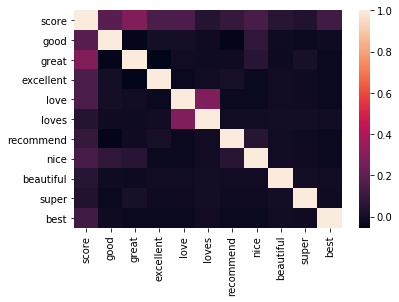

In [138]:
sns.heatmap(sa_raw.corr())
#sns.heatmap(sms_raw.corr())

In [139]:
#data = sms_raw[keywords + ['allcaps'] + ['ex_marks']]
#target = sms_raw['spam']

data = sa_raw[keywords]
target = sa_raw['score']

In [140]:
from sklearn.naive_bayes import BernoulliNB


In [141]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

In [142]:
# Fit our model to the data.
bnb.fit(data, target)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [143]:
# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

In [144]:
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 281


## Conclusion:

### The number of mislabeled points out of 1000 is 281 so far.